### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자!
- 다중분류 딥러닝 모델링을 연습해보자~

In [1]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 데이터 로딩

In [2]:
# keras 에서 제공해주는 손글씨데이터 불러오기
from tensorflow.keras.datasets import mnist

In [3]:
# 문제데이터와 정답데이터가 나뉘어 제공해주고 있음
# 훈련용, 테스트용 데이터도 나뉘어 제공
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# 데이터 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 훈련데이터 6만장, 테스트데이터 1만장
# 28*28 픽셀
# 픽셀: 사진의 정보를 가지고있는 단위 (작은사각형 하나가 1픽셀)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


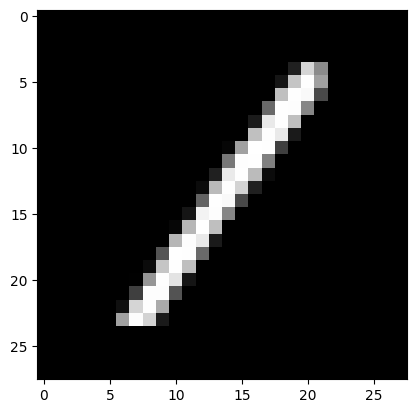

In [5]:
# 사진데이터확인
plt.imshow(X_train[1003], cmap = 'gray')
# 흑백사진
# 0 ~255 검정색의 정도를 숫자로 가진다

In [6]:
y_train[1001]

7

In [7]:
# 정답데이터 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### MLP 모델링
- 입력층의 구조, 출력층의 구조 고려
- 학습능력을 위한 중간층의 깊이 고려
- loss,optimizer 설정


In [8]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Dense: 퍼셉트론을 묶음으로 표현하는 클래스
# InputLayer: 입력층 설정
#  Flatten: 2차원의 사진데이터를 1차원으로 표현하기위한 클래스

In [44]:
# 1. 신경망 설계
# 뼈대
digit_model = Sequential()
# 입력층
digit_model.add(InputLayer (input_shape = (28,28))) # 28*28 의 차원 데이터
# 중간층 (은닉층)
digit_model.add(Flatten()) # 2차원의 사진데이터를 1차원으로 변경 (선형모델을 위한 작업)
digit_model.add(Dense(units = 16, activation = 'relu'))
digit_model.add(Dense(units = 8, activation = 'relu'))
digit_model.add(Dense(units = 32, activation = 'relu'))
digit_model.add(Dense(units = 16, activation = 'relu'))
digit_model.add(Dense(units = 8, activation = 'relu'))

# 출력층
digit_model.add(Dense(units = 10 , activation = 'softmax'))
# 다중분류는 클래스의 개수만큼 선형모델이 필요하다
# 활성화함수: softmax (클래스개수만큼 확률값이 출력 -> 총합 1로 만들어주는 함수)

[🤖정리🤖]
##### 출력층에서 사용하는 unit 의 개수와 활성화 함수
- 회귀: units = 1, activation = 'linear' (default)
- 이진분류: units = 1, activation = 'sigmoid'
- 다중분류: units = 클래스의 개수, activation = 'softmax'

In [45]:
# 2. 모델 학습및평가 방법 설정
digit_model.compile(loss = 'sparse_categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])
# loss: 오차 실제값과 예측값의 차이
# 회귀: mean_squared_error
# 이진분류: binary_crossentropy
# 다중분류: categorical_crossentropy

In [46]:
# 3. 모델 학습 및 시각화
h1 = digit_model.fit(X_train,y_train,
                     validation_split = 0.2,
                     epochs = 20)

# 문제발생!!
# 오류 확인 -> 정답데이터의 shape가 일치하지 않음!! (shape 가 다르면 비교 X)
# y_train 확인해보자!

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 1.6911 - accuracy: 0.3857 - val_loss: 1.0479 - val_accuracy: 0.6399
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9521 - accuracy: 0.6844 - val_loss: 0.8070 - val_accuracy: 0.7701
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7409 - accuracy: 0.7781 - val_loss: 0.6206 - val_accuracy: 0.8256
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5841 - accuracy: 0.8301 - val_loss: 0.5550 - val_accuracy: 0.8380
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5161 - accuracy: 0.8498 - val_loss: 0.4365 - val_accuracy: 0.8762
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4582 - accuracy: 0.8710 - val_loss: 0.4080 - val_accuracy: 0.8851
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4146 - accuracy: 0.8830 - val_loss: 0.3815 - val_accuracy:

In [15]:
# 정답데이터의 형태 확인
y_train
# 실제 결과값 (클래스중 하나를 출력 -> 범주)
# 모델링 결과 : 10개의 클래스에 대한 각각의 확률값
# 1개와 10개는 비교가 불가능!!

# 2가지 해결방법
#[방법1. 정답데이터를 확률로 변경]
#[방법2. loss 함수를 변경 ]
# keras에서 지원하는 자동으로 정답데이터를 알아서 확률로 계산해주는 방법

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
#[방법1. 정답데이터를 확률값으로 변경하기]
# 모델의 예측값은 확률값으로 출력 / 정답데이터는 범주형데이터 비교(loss) 불가
# 우리가 직접 정답데이터를 범주형에서 확률값으로 변경 해주자!
from tensorflow.keras.utils import to_categorical
# 범주형데이터를 확률값으로 변경!
one_hot_y_train = to_categorical(y_train)
one_hot_y_train[0:2]
# 첫번째 데이터 5일 확률 100%, 두번째 데이터는 0일확률 100%

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
# [방법2. loss 함수를 'sparse_categorical_crossentropy'라고 변경]
# 평가를 할때 알아서 확률값으로 변경해서 계산
# 스스로 내부에서 범주값을 확률값으로 변경하는 작업을 수행 후 loss 값 계산
digit_model.compile(loss = 'sparse_categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])
# 2번 방법을 더 선호

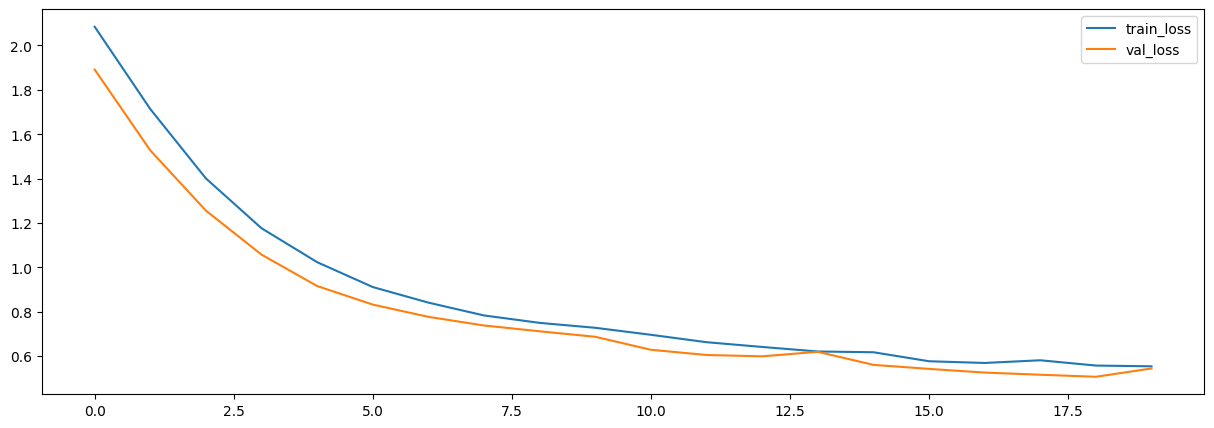

In [24]:
# 학습결과 시각화
# loss
# val_loss
plt.figure(figsize = (15,5))
plt.plot(h1.history['loss'], label = 'train_loss')
plt.plot(h1.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [47]:
# 4. 모델 예측 및 평가
digit_model.evaluate(X_test,y_test)
# 정확도 약 0.857
# relu: 정확도 0.905 증가

313/313 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.9052


[0.34493282437324524, 0.9052000045776367]

### 직접 작성한 손글씨 숫자 test해보기

In [26]:
# 파이썬에서 이미지를 처리하는 라이브러리
import PIL.Image as pimg

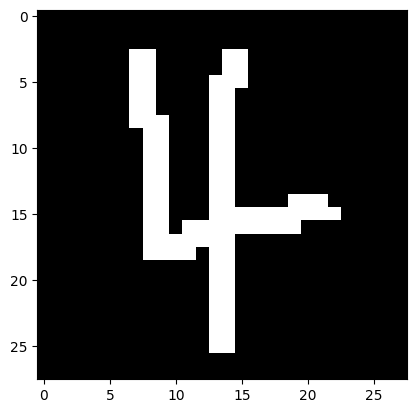

In [48]:
img = pimg.open('/content/drive/MyDrive/Colab Notebooks/23.09.15 DeepLearning (Spring)/data/손글씨/4.png').convert('L')
plt.imshow(img, cmap = 'gray')

In [49]:
# 전처리
# 이미지타입을 배열로 변환
img = np.array(img)
img.shape

(28, 28)

In [50]:
# 2차원 -> 1차원
test_img = img.reshape(1,28,28,1)
test_img.astype('float32') /255
test_img.shape

(1, 28, 28, 1)

In [51]:
# 예측
digit_model.predict(test_img)
# 결과: 10개의 확률로 출력


1/1 [==============================] - 0s 83ms/step


array([[0.01400756, 0.00939745, 0.22035994, 0.02259881, 0.08140618,
        0.04763127, 0.22506575, 0.00309942, 0.3713369 , 0.00509664]],
      dtype=float32)

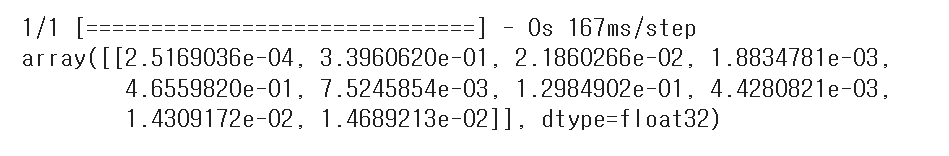

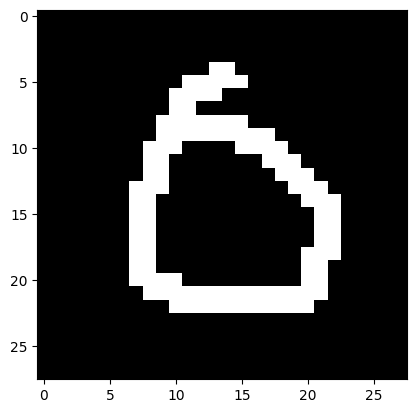

In [52]:
img2 = pimg.open('/content/drive/MyDrive/Colab Notebooks/23.09.15 DeepLearning (Spring)/data/손글씨/6.png').convert('L')
plt.imshow(img2,cmap = 'gray')